In [1]:
# Import csv to read in the CityPop-1 data
import csv

# Defining the City class with the required attributes in the __init__ method
class City:
    def __init__(self, name, label, latitude, longitude, populations):
        self.name = name
        self.label = label
        self.latitude = latitude
        self.longitude = longitude
        self.populations = populations  # This is expected to be a dictionary where keys are years
# __str__ returns all the attributes 
    def __str__(self):
        return f"{self.name}, {self.label}, {self.latitude}, {self.longitude}, {self.populations}"
    
# Reading data from the csv and creating city instances
Cities = []  # This list will store the instances of the City objects

# Opens the csv file to allow access and manipulate the data
with open('CityPop-1.csv', mode='r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Extracting data from each row and creating a City instance
        name = row['city']
        label = row['label']
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        populations = {year: float(row[year]) for year in ['yr1970', 'yr1975', 'yr1980', 'yr1985', 'yr1990', 'yr1995', 'yr2000', 'yr2005', 'yr2010']}
        city = City(name, label, latitude, longitude, populations)
        Cities.append(city)

# Printing out the attributes of all City instances
for city in Cities:
    print(city)

Tokyo, Tokyo, 35.6832085, 139.8089447, {'yr1970': 23.3, 'yr1975': 26.61, 'yr1980': 28.55, 'yr1985': 30.3, 'yr1990': 32.53, 'yr1995': 33.59, 'yr2000': 34.45, 'yr2005': 35.62, 'yr2010': 36.67}
New_Delhi, New Delhi, 28.6082802, 77.2008133, {'yr1970': 3.53, 'yr1975': 4.43, 'yr1980': 5.56, 'yr1985': 7.33, 'yr1990': 9.73, 'yr1995': 12.41, 'yr2000': 15.73, 'yr2005': 19.49, 'yr2010': 22.16}
Sao_Paulo, Sao Paulo, -23.5628395, -46.6546402, {'yr1970': 7.62, 'yr1975': 9.61, 'yr1980': 12.09, 'yr1985': 13.39, 'yr1990': 14.78, 'yr1995': 15.95, 'yr2000': 17.1, 'yr2005': 18.65, 'yr2010': 20.26}
Mumbai, Mumbai, 18.93013, 72.8300934, {'yr1970': 5.81, 'yr1975': 7.08, 'yr1980': 8.66, 'yr1985': 10.34, 'yr1990': 12.31, 'yr1995': 14.11, 'yr2000': 16.09, 'yr2005': 18.21, 'yr2010': 20.04}
Mexico_City, Mexico City, 19.4319592, -99.1331635, {'yr1970': 8.77, 'yr1975': 10.69, 'yr1980': 13.01, 'yr1985': 14.11, 'yr1990': 15.31, 'yr1995': 16.81, 'yr2000': 18.02, 'yr2005': 18.73, 'yr2010': 19.46}
New_York, New York, 40

In [2]:
# Importing the required modules
import csv
import math

# Defining the City class same way in the previous cell
class City:
    def __init__(self, name, label, latitude, longitude, populations):
        self.name = name
        self.label = label
        self.latitude = latitude
        self.longitude = longitude
        self.populations = populations

    def __str__(self):
        return f"{self.name}, {self.label}, {self.latitude}, {self.longitude}, {self.populations}"
# Distance defintion that gets the two cities and uses the Haversine formula to calculate the distance  
    def printDistance(self, othercity):
        R = 6371  # Radius of the Earth in km
        # Use math module to convert degrees to radians
        lat1_rad = math.radians(self.latitude)
        lat2_rad = math.radians(othercity.latitude)
        delta_lat = math.radians(othercity.latitude - self.latitude)
        delta_lon = math.radians(othercity.longitude - self.longitude)
        # Haversine equation using trig from math module
        a = math.sin(delta_lat/2) * math.sin(delta_lat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon/2) * math.sin(delta_lon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = R * c
        print(f"Distance between {self.label} and {othercity.label} is {distance:.2f} km.")
# Pop change definition gets the city of interest and two years to compare populations    
    def printPopChange(self, year1, year2):
        # Calculating the population change
        if year1 in self.populations and year2 in self.populations:
            pop_change = self.populations[year2] - self.populations[year1]
            print(f"The population change in {self.name} from {year1} to {year2} is {pop_change}")
        else:
            print("One or both of the years are not available in the data.")
Cities = []

# Opens the csv file same as previous cell
with open('CityPop-1.csv', mode='r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        name = row['city']
        label = row['label']
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        populations = {year: float(row[year]) for year in ['yr1970', 'yr1975', 'yr1980', 'yr1985', 'yr1990', 'yr1995', 'yr2000', 'yr2005', 'yr2010']}
        city = City(name, label, latitude, longitude, populations)
        Cities.append(city)
        
# Test the definitions
Cities[0].printDistance(Cities[1])  
Cities[0].printPopChange('yr1970', 'yr1990')

Distance between Tokyo and New Delhi is 5848.90 km.
The population change in Tokyo from yr1970 to yr1990 is 9.23


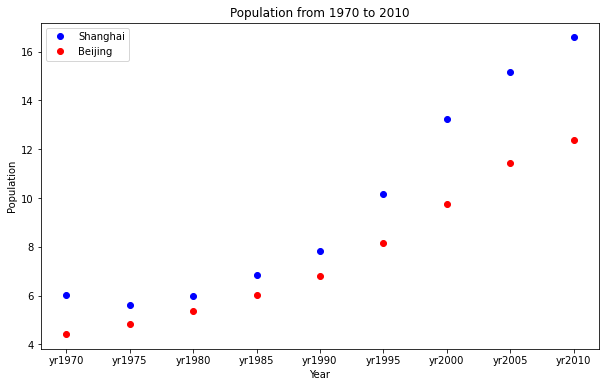

In [3]:
# Import in order to create plots
import matplotlib.pyplot as plt
# Choose any two cities
city1 = Cities[6]
city2 = Cities[12]

# Years from 1970 to 2010 for the x-axis
years = ['yr1970', 'yr1975', 'yr1980', 'yr1985', 'yr1990', 'yr1995', 'yr2000', 'yr2005', 'yr2010']

# Extracting population data for both cities
pop1 = [city1.populations[year] for year in years]
pop2 = [city2.populations[year] for year in years]

# Creating the plot and style of plot using marker and linestyle
plt.figure(figsize=(10, 6))
plt.plot(years, pop1, marker='o', linestyle='', color='b', label=city1.name)
plt.plot(years, pop2, marker='o', linestyle='', color='r', label=city2.name)

# Adding titles and labels to the plot
plt.title('Population from 1970 to 2010')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

# Show the plot
plt.show()